In [1]:
##IMPPORTING USEFUL LIBRARIES

In [2]:

import numpy as np 
import pandas as pd
import pickle

#Graphics
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns #visualize
from collections import Counter

 # don't show warnings
import warnings
warnings.filterwarnings("ignore")

#Modelling
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn import metrics

In [3]:
fifa=pd.read_csv("players_20.csv")

In [4]:
fifa


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [5]:
fifa.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [6]:
def transform_object_cols(col):
    new_values=[]
    for j in col:
        if('+' in str(j)):
            k=str(j).split('+')
            new_val=int(k[0])+int(k[1])
            new_values.append(new_val)
        elif('-' in str(j)):
            k=str(j).split('-')
            new_val=int(k[0])-int(k[1])
            new_values.append(new_val)
        else:
            new_val=int(j)
            new_values.append(new_val)
    return new_values

In [7]:
def clean_fifa_data(df):
    
    #Working with Null Values in String Columns
    df['player_tags']=df['player_tags'].fillna('')
    df['loaned_from']=df['loaned_from'].fillna('Unknown')
    df['joined']=df['joined'].fillna('2019-07-10')
    df['contract_valid_until']=df['contract_valid_until'].fillna(2019.0)
    df['nation_position']=df['nation_position'].fillna('Unknown')
    df['release_clause_eur']=df['release_clause_eur'].fillna(0)
    
    #Working with Null Values in String Columns
    for i in df.columns:
        if df[i].isna().sum()>0:
            df[i]=df[i].fillna(0)
            
    # Find Columns to remove + and -
    columns=list(df.columns)
    trans=[]
    for c in range(len(columns)):
        if c>=columns.index('attacking_crossing'):
            trans.append(columns[c])
            
    #Use Transform Function to transoform Data 
    df[trans]=df[trans].transform(transform_object_cols)
    
    return df

In [8]:
fifa20=clean_fifa_data(fifa)

In [9]:
fifa20

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,70,68,68,68,70,65,54,54,54,65
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,68,64,64,64,68,64,56,56,56,64
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,69,64,64,64,69,64,49,49,49,64
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,0,0,0,0,0,0,0,0,0,0
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,69,66,66,66,69,64,52,52,52,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,45,44,44,44,45,47,48,48,48,47
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,46,45,45,45,46,48,49,49,49,48
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,49,51,51,51,49,49,51,51,51,49
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,50,50,50,50,50,50,51,51,51,50


In [10]:
fifa20=fifa20.drop(['player_url','sofifa_id','short_name','long_name','dob','nationality','team_position','club','potential','player_positions','real_face','body_type','player_tags','loaned_from','joined','nation_position','player_traits','nation_jersey_number'],axis=1)

In [11]:
fifa20

,age,height_cm,weight_kg,overall,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,32,170,72,94,95500000,565000,Left,5,4,4,...,70,68,68,68,70,65,54,54,54,65
1,34,187,83,93,58500000,405000,Right,5,4,5,...,68,64,64,64,68,64,56,56,56,64
2,27,175,68,92,105500000,290000,Right,5,5,5,...,69,64,64,64,69,64,49,49,49,64
3,26,188,87,91,77500000,125000,Right,3,3,1,...,0,0,0,0,0,0,0,0,0,0
4,28,175,74,91,90000000,470000,Right,4,4,4,...,69,66,66,66,69,64,52,52,52,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,22,186,79,48,40000,2000,Right,1,3,2,...,45,44,44,44,45,47,48,48,48,47
18274,22,177,66,48,40000,2000,Right,1,2,2,...,46,45,45,45,46,48,49,49,49,48
18275,19,186,75,48,40000,1000,Right,1,2,2,...,49,51,51,51,49,49,51,51,51,49
18276,18,185,74,48,40000,1000,Right,1,2,2,...,50,50,50,50,50,50,51,51,51,50


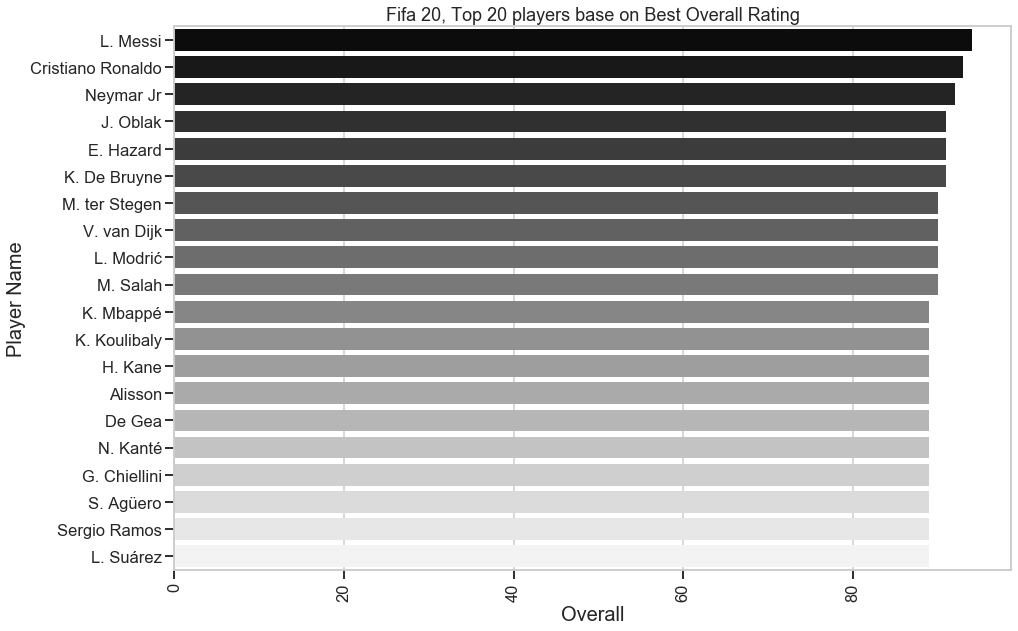

In [12]:
# problem : Top 20 players overall
# We get the names and overals from the data
Overall = fifa["overall"]
footballer_name = fifa["short_name"]

# We create dataframe(Name,Overall)
data = pd.DataFrame({'PlayerName': footballer_name,'BestOverallRating':Overall})

x = data.PlayerName.head(20)  # comes in order from large to small
y = data.BestOverallRating.head(20)

# visualize
sns.set_context('talk')
plt.figure(figsize=(15,10))
"""
cubehelix_palette = This produces a colormap with linearly-decreasing (or increasing) brightness.
(sets according to the number of data)
"""
ax= sns.barplot(x=y, y=x,palette ='gray') # x = Name, y = Overall
plt.xticks(rotation= 90)
plt.xlabel('Overall', size = 20) # x-axis name
plt.ylabel('Player Name', size = 20 ) # y-axis name
plt.title('Fifa 20, Top 20 players base on Best Overall Rating') 
plt.show()

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.1, p.get_height()+30))

fig = ax.get_figure()
# fig.savefig('top_players.png') 

In [13]:
def add_dummy(col_name,df):
    if col_name not in df.columns:
        print('Column not in DataFrame')
        return
    else:
        df=pd.concat([df,pd.get_dummies(df[col_name],prefix=col_name[:2])],axis=1)
        df.drop(col_name,axis=1,inplace=True)
        if col_name not in df.columns:
            print('Dummies Succesfully Created')
    return df
def join_dataframe(df1,df2,col_name):
    #Let's start by stripping the data string 
    df1[col_name]=df1[col_name].astype('string').str.strip()
    df2[col_name]=df2[col_name].astype('string').str.strip()
    joined=df1.merge(df2,on=col_name)
    return joined
def drop_cols(df):
    df_new = df.drop(['player_url','sofifa_id','long_name','wage_eur','dob','wage_eur','nationality','team_position','player_positions','real_face','body_type','player_tags','loaned_from','joined','nation_position','player_traits','nation_jersey_number'],axis=1)
    return df_new

In [14]:
fifa20.columns.values

array(['age', 'height_cm', 'weight_kg', 'overall', 'value_eur',
       'wage_eur', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'release_clause_eur',
       'team_jersey_number', 'contract_valid_until', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning',
       'mentali

In [15]:
#Adding dummy variables for categorical columns
fifa20 = add_dummy('preferred_foot',fifa20)
fifa20 = add_dummy('work_rate',fifa20)

Dummies Succesfully Created
Dummies Succesfully Created


In [16]:
fifa20 = fifa20.drop('wo_Low/Low',axis = 1)
fifa20


,age,height_cm,weight_kg,overall,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,...,pr_Left,pr_Right,wo_High/High,wo_High/Low,wo_High/Medium,wo_Low/High,wo_Low/Medium,wo_Medium/High,wo_Medium/Low,wo_Medium/Medium
0,32,170,72,94,95500000,565000,5,4,4,195800000.0,...,1,0,0,0,0,0,0,0,1,0
1,34,187,83,93,58500000,405000,5,4,5,96500000.0,...,0,1,0,1,0,0,0,0,0,0
2,27,175,68,92,105500000,290000,5,5,5,195200000.0,...,0,1,0,0,1,0,0,0,0,0
3,26,188,87,91,77500000,125000,3,3,1,164700000.0,...,0,1,0,0,0,0,0,0,0,1
4,28,175,74,91,90000000,470000,4,4,4,184500000.0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,22,186,79,48,40000,2000,1,3,2,70000.0,...,0,1,0,0,0,0,0,1,0,0
18274,22,177,66,48,40000,2000,1,2,2,72000.0,...,0,1,0,0,0,0,0,0,0,1
18275,19,186,75,48,40000,1000,1,2,2,70000.0,...,0,1,0,0,0,0,1,0,0,0
18276,18,185,74,48,40000,1000,1,2,2,70000.0,...,0,1,0,0,0,0,0,0,0,0


### Correlation

In [17]:
corr_matrix = fifa20.corr()

In [18]:
corr_matrix

,age,height_cm,weight_kg,overall,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,...,pr_Left,pr_Right,wo_High/High,wo_High/Low,wo_High/Medium,wo_Low/High,wo_Low/Medium,wo_Medium/High,wo_Medium/Low,wo_Medium/Medium
age,1.000000,0.081391,0.237169,0.464305,0.081513,0.151031,0.259582,0.073988,0.045277,0.068263,...,-0.006451,0.006451,0.068162,0.017780,0.000646,0.053967,0.043713,0.090395,0.007440,-0.125281
height_cm,0.081391,1.000000,0.768816,0.039945,0.009527,0.019547,0.037935,-0.175200,-0.429980,0.010872,...,-0.083072,0.083072,-0.069575,-0.079896,-0.182596,0.073317,0.097086,0.054128,-0.054702,0.139845
weight_kg,0.237169,0.768816,1.000000,0.156522,0.051782,0.065946,0.090854,-0.128568,-0.352060,0.047586,...,-0.077787,0.077787,-0.030978,-0.056610,-0.157263,0.072517,0.078058,0.064624,-0.039358,0.087169
overall,0.464305,0.039945,0.156522,1.000000,0.638230,0.573578,0.475557,0.230276,0.401261,0.607130,...,0.034474,-0.034474,0.143063,0.052695,0.120967,0.023137,-0.016214,0.098521,0.005936,-0.236991
value_eur,0.081513,0.009527,0.051782,0.638230,1.000000,0.858052,0.618133,0.169084,0.303694,0.977359,...,0.012596,-0.012596,0.117248,0.030137,0.085189,-0.012491,-0.030203,0.045065,0.000085,-0.141519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wo_Low/High,0.053967,0.073317,0.072517,0.023137,-0.012491,-0.006411,0.000940,-0.055545,-0.058660,-0.013268,...,-0.029771,0.029771,-0.036486,-0.030127,-0.070604,1.000000,-0.024578,-0.049215,-0.034487,-0.165640
wo_Low/Medium,0.043713,0.097086,0.078058,-0.016214,-0.030203,-0.022579,-0.015259,-0.064730,-0.060053,-0.029003,...,-0.013066,0.013066,-0.038410,-0.031716,-0.074328,-0.024578,1.000000,-0.051810,-0.036306,-0.174375
wo_Medium/High,0.090395,0.054128,0.064624,0.098521,0.045065,0.049076,0.043415,-0.005140,-0.030950,0.046450,...,-0.017152,0.017152,-0.076913,-0.063508,-0.148833,-0.049215,-0.051810,1.000000,-0.072698,-0.349167
wo_Medium/Low,0.007440,-0.054702,-0.039358,0.005936,0.000085,0.003128,0.020562,0.050745,0.129841,-0.001318,...,0.004613,-0.004613,-0.053896,-0.044503,-0.104294,-0.034487,-0.036306,-0.072698,1.000000,-0.244677


In [19]:
corr_matrix["overall"].sort_values(ascending=False)

overall                1.000000
movement_reactions     0.864526
mentality_composure    0.719992
value_eur              0.638230
release_clause_eur     0.607130
                         ...   
gk_handling           -0.032460
pr_Right              -0.034474
gk_kicking            -0.036289
team_jersey_number    -0.195822
wo_Medium/Medium      -0.236991
Name: overall, Length: 94, dtype: float64

In [20]:
### MODELLING


In [21]:
X=fifa20.drop(['overall'],axis=1)
Y=fifa20['overall']


In [22]:
#SPLITTING DATA INTO TRAIN AND TEST DATA
x_train,x_val,y_train,y_val=train_test_split(X,Y,train_size=0.3, random_state=123)
print('train x:', x_train.shape)
print('train y:', y_train.shape)
print('valid x:', x_val.shape)
print('valid y:', y_val.shape)

train x: (5483, 93)
train y: (5483,)
valid x: (12795, 93)
valid y: (12795,)


In [23]:
#Standardizing 
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)

In [24]:
#ORDINARY LEAST SQUARES(lINEAR REGRESSION MODEL)

In [25]:
lr = LinearRegression()
lr.fit(x_train, y_train)


# print errors
train_y_pred = lr.predict(x_train)
MAE_train = mean_absolute_error(y_train, train_y_pred)
print('MAE_train: ', MAE_train)

valid_y_pred = lr.predict(x_val)
MAE_valid = mean_absolute_error(y_val, valid_y_pred)

print('Mean Absolute Error : ', metrics.mean_absolute_error(y_val, valid_y_pred).round(2))
print('Mean Squared Error : ', metrics.mean_squared_error(y_val, valid_y_pred).round(2))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_absolute_error(y_val, valid_y_pred).round(2)))



MAE_train:  1.6344642879438684
Mean Absolute Error :  1.64
Mean Squared Error :  4.4
Root Mean Squared Error :  1.2806248474865698


In [26]:
lr.score(x_val, y_val)

0.9084677078655242

In [27]:
#PREDICTING
y_pred = lr.predict(x_val)

print(y_pred)

[57.87516643 61.5484007  70.72539467 ... 71.24760294 83.5437503
 59.17769004]


In [28]:
#IMPORTING OTHER DATASET
fifa19=pd.read_csv("data.csv")


In [29]:
fifa19.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [30]:
cols = ['ID','Photo', 'Flag','Club Logo','Special','Jersey Number','Loaned From','Contract Valid Until',
        'Release Clause','GKDiving', 'GKHandling','GKKicking', 'GKPositioning', 'GKReflexes','Reactions',
        'Balance', 'LS', 'ST', 'RS', 'LW', 'LF','CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
        'RCM', 'RM', 'LWB', 'LDM','CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Unnamed: 0']

In [31]:
# making a copy of the original df to clean it
df_clean = fifa19.copy()


In [32]:
#drop the useless columns it's better to make a list of the columns and then drop them
df_clean.drop(columns=cols,inplace=True)

In [33]:
X=df_clean.drop(['Overall'],axis=1)
Y=df_clean['Overall']

In [34]:
lm = LinearRegression(df_clean)
lm


LinearRegression(copy_X=True,
                 fit_intercept=                     Name  Age Nationality  Overall  Potential  \
0                L. Messi   31   Argentina       94         94   
1       Cristiano Ronaldo   33    Portugal       94         94   
2               Neymar Jr   26      Brazil       92         93   
3                  De Gea   27       Spain       91         93   
4            K. De Bruyne   27     Belgium       91         92   
...                   ...  ...         ...      ...        ...   
18202        J. Lundstram   19     England       47         65   
18203  N. Christoffersson   19      Sweden       47         63   
18204           B. Worman   16     England       47         67   
18205      D. Walker-Rice   17     England       47         66   
18206           G. Nugent   16     Eng...
3            12.0   68.0      40.0      68.0    15.0           21.0   
4            87.0   94.0      79.0      88.0    68.0           58.0   
...           ...    ...     

In [35]:
pickle.dump(lr,open('model.pkl','wb'))